In [128]:
import numpy as np
import yt
import matplotlib.pyplot as plt

In [2]:
yt.__version__

'4.0.dev0'

In [148]:
snapshot = '/Volumes/orange/narayanan/s.lower/simba/filtered_snapshots/snap305/galaxy_201.hdf5'
#pos_file = '/Volumes/orange/narayanan/s.lower/eagle/eagle_snap28_pos.npz'

ds = yt.load('/Volumes//orange/narayanan/s.lower/TNG/filtered_snapshots/snap99/galaxy_500.hdf5')
ad = ds.all_data()

yt : [INFO     ] 2020-06-04 10:58:33,864 Calculating time from 1.000e+00 to be 4.356e+17 seconds
yt : [INFO     ] 2020-06-04 10:58:34,014 Parameters: current_time              = 4.355810528213311e+17 s
yt : [INFO     ] 2020-06-04 10:58:34,015 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2020-06-04 10:58:34,015 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-06-04 10:58:34,016 Parameters: domain_right_edge         = [75000. 75000. 75000.]
yt : [INFO     ] 2020-06-04 10:58:34,017 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-06-04 10:58:34,019 Parameters: current_redshift          = 2.220446049250313e-16
yt : [INFO     ] 2020-06-04 10:58:34,020 Parameters: omega_lambda              = 0.6911
yt : [INFO     ] 2020-06-04 10:58:34,027 Parameters: omega_matter              = 0.3089
yt : [INFO     ] 2020-06-04 10:58:34,030 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-06-04 10:58:34,032 Parameters: hubble_consta

In [106]:
star_coords[0]

unyt_array([  960.63598214, 26260.99762776, 18700.6872829 ], 'code_length')

In [108]:
gas_coords[0]

unyt_array([  263.56189959, 27007.40721438, 16437.45303444], 'code_length')

In [120]:
(np.sum(gas_masses * gas_coords[:,2]))  / np.sum(gas_masses)

unyt_quantity(17050.97367717, 'code_length')

In [101]:
ds.quan(10., 'code_length').in_units('kpc')

unyt_quantity(14.76232855, 'kpc')

In [114]:
(np.sum(star_masses * star_coords[:,2]))  / np.sum(star_masses)

unyt_quantity(17960.58558191, 'code_length')

In [149]:
gas_masses = ad[('PartType0', 'Masses')]
gas_coords = ad[('PartType0', 'Coordinates')]
star_masses = ad[('PartType4', 'Masses')]
star_coords = ad[('PartType4', 'Coordinates')]
total_mass = np.sum(gas_masses) + np.sum(star_masses)

x_pos = (np.sum(gas_masses * gas_coords[:,0]) + np.sum(star_masses * star_coords[:,0])) / total_mass
y_pos = (np.sum(gas_masses * gas_coords[:,1]) + np.sum(star_masses * star_coords[:,1])) / total_mass
z_pos = (np.sum(gas_masses * gas_coords[:,2]) + np.sum(star_masses * star_coords[:,2])) / total_mass

In [118]:
np.sum(star_masses.in_units('Msun').value)

390088555314.28796

In [150]:
x_pos, y_pos, z_pos

(unyt_quantity(68674.41904226, 'code_length'),
 unyt_quantity(25145.74579086, 'code_length'),
 unyt_quantity(13566.51119504, 'code_length'))

In [117]:
np.sum(gas_masses.in_units('Msun').value)

3007038471312.109

In [146]:
temp_y = ds.quan(27368.5, 'code_length')
temp_x = ds.quan(832., 'code_length')
temp_z = ds.quan(17155.4, 'code_length')

In [138]:
p = yt.ParticlePlot(ds, 'particle_position_x', 'particle_position_y', 'particle_mass', width=(200, 'kpc'), 
                    center=(temp_x.in_units('kpc'), temp_y.in_units('kpc'), temp_z.in_units('kpc')))
p.save('particle_plot_x_gal'+str(0)+'.png')

yt : [INFO     ] 2020-06-04 10:44:46,525 xlim = 1128.225735 1328.225735
yt : [INFO     ] 2020-06-04 10:44:46,527 ylim = 43254.744594 43454.744594
yt : [INFO     ] 2020-06-04 10:44:46,531 xlim = 1128.225735 1328.225735
yt : [INFO     ] 2020-06-04 10:44:46,532 ylim = 43254.744594 43454.744594
yt : [INFO     ] 2020-06-04 10:44:46,535 Splatting (('PartType0', 'particle_mass')) onto a 800 by 800 mesh
/Users/sidneylower/yt/yt/visualization/plot_window.py:907: RuntimeWarning: All-NaN axis encountered
  elif np.nanmax(image) == np.nanmin(image):
/Users/sidneylower/yt/yt/visualization/plot_window.py:910: RuntimeWarning: All-NaN axis encountered
  elif np.nanmax(image) <= 0:
yt : [WARNING  ] 2020-06-04 10:44:46,650 Plot image for field ('PartType0', 'particle_mass') is filled with NaNs.
yt : [WARNING  ] 2020-06-04 10:44:46,650 Switching to linear colorbar scaling.
yt : [INFO     ] 2020-06-04 10:44:46,928 Saving plot particle_plot_x_gal0.png


['particle_plot_x_gal0.png']

In [147]:
for i in [0]:
    filename_x = 'proj.'+str(i)+'.x_density.png'
    prj = yt.ProjectionPlot(ds,'x',('PartType0', 'density'),width=(500,'kpc'),
                            center=(temp_x.in_units('kpc'), temp_y.in_units('kpc'), temp_z.in_units('kpc')))
    prj.save(filename_x)


    '''filename_y = 'proj.'+str(i)+'.y_tng.png'
    prj = yt.ProjectionPlot(ds,'y',('PartType0', 'density'),width=(200,'kpc'),
                            center=(x_pos.in_units('kpc'), y_pos.in_units('kpc'), z_pos.in_units('kpc')))
    prj.save(filename_y)

    filename_z = 'proj.'+str(i)+'.z_tng.png'
    prj = yt.ProjectionPlot(ds,'z',('PartType0', 'density'),width=(200,'kpc'),
                            center=(x_pos.in_units('kpc'), y_pos.in_units('kpc'), z_pos.in_units('kpc')))
    prj.save(filename_z)'''

yt : [INFO     ] 2020-06-04 10:50:31,606 xlim = 40152.278885 40652.278885
yt : [INFO     ] 2020-06-04 10:50:31,608 ylim = 25075.365116 25575.365116
yt : [INFO     ] 2020-06-04 10:50:31,611 xlim = 27199.150023 27537.849977
yt : [INFO     ] 2020-06-04 10:50:31,614 ylim = 16986.050023 17324.749977
yt : [INFO     ] 2020-06-04 10:50:31,626 Making a fixed resolution buffer of (('PartType0', 'density')) 800 by 800
yt : [INFO     ] 2020-06-04 10:52:01,545 Saving plot proj.0.x_density.png


In [27]:
ad = ds.all_data()

In [55]:
3743 / 2.5

1497.2

In [11]:
ds.field_list

[('PartType0', 'AExpMaximumTemperature'),
 ('PartType0', 'Carbon'),
 ('PartType0', 'Coordinates'),
 ('PartType0', 'Density'),
 ('PartType0', 'Entropy'),
 ('PartType0', 'GroupNumber'),
 ('PartType0', 'Helium'),
 ('PartType0', 'HostHalo_TVir_Mass'),
 ('PartType0', 'Hydrogen'),
 ('PartType0', 'InternalEnergy'),
 ('PartType0', 'Iron'),
 ('PartType0', 'IronMassFracFromSNIa'),
 ('PartType0', 'Magnesium'),
 ('PartType0', 'Mass'),
 ('PartType0', 'MaximumTemperature'),
 ('PartType0', 'MetalMassFracFromAGB'),
 ('PartType0', 'MetalMassFracFromSNII'),
 ('PartType0', 'MetalMassFracFromSNIa'),
 ('PartType0', 'Metallicity'),
 ('PartType0', 'Neon'),
 ('PartType0', 'Nitrogen'),
 ('PartType0', 'OnEquationOfState'),
 ('PartType0', 'Oxygen'),
 ('PartType0', 'ParticleIDs'),
 ('PartType0', 'Silicon'),
 ('PartType0', 'SmoothedIronMassFracFromSNIa'),
 ('PartType0', 'SmoothedMetallicity'),
 ('PartType0', 'SmoothingLength'),
 ('PartType0', 'StarFormationRate'),
 ('PartType0', 'SubGroupNumber'),
 ('PartType0', '

In [18]:
np.sum(ad[('PartType0', 'Mass')].in_units('Msun'))

600497123.0048859 Msun

In [45]:
sum(ad[('PartType0', 'Mass')].in_units('Msun').value)

87766194.38036907

(array([ 3.,  7.,  4., 10.,  7.,  4.,  4.,  1.,  1.,  1.]),
 array([6.25923994, 6.27462837, 6.2900168 , 6.30540523, 6.32079366,
        6.33618209, 6.35157052, 6.36695895, 6.38234738, 6.39773581,
        6.41312424]),
 <a list of 10 Patch objects>)

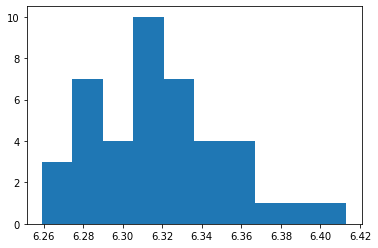

In [44]:
plt.hist(np.log10(ad[('PartType0', 'Mass')].in_units('Msun').value))

In [28]:
ad[('PartType0', 'Coordinates')]

unyt_array([[ 9.26841657,  4.16451309, 25.61512755],
            [ 9.26818946,  4.16195607, 25.61372505],
            [ 9.27274052,  4.16639841, 25.61867972],
            [ 9.27117114,  4.16694497, 25.62035826],
            [ 9.27114962,  4.16794785, 25.61751896],
            [ 9.27201567,  4.16792148, 25.61802774],
            [ 9.2716928 ,  4.16731316, 25.61708226],
            [ 9.27171282,  4.1682568 , 25.6174469 ],
            [ 9.27165131,  4.1690025 , 25.61724437],
            [ 9.27221026,  4.16894612, 25.6170453 ],
            [ 9.27218111,  4.16896978, 25.61688219],
            [ 9.27130615,  4.16878172, 25.6183588 ],
            [ 9.27161019,  4.16819462, 25.61793952],
            [ 9.27267058,  4.1687525 , 25.61725418],
            [ 9.27272296,  4.16806078, 25.61779917],
            [ 9.27274035,  4.16785914, 25.61875331],
            [ 9.27254171,  4.16804518, 25.61821834],
            [ 9.27233308,  4.16724937, 25.61924011],
            [ 9.26998224,  4.16938532, 25.6172

In [29]:
center

(26.804664962275805, 21.355854582675864, 17.50017682878184)

In [30]:
ad[('PartType4', 'Coordinates')]

unyt_array([[ 9.27544392,  4.17176985, 25.62810579],
            [ 9.27726372,  4.17132814, 25.6246809 ],
            [ 9.27800689,  4.17181889, 25.62371001],
            [ 9.27757007,  4.16821423, 25.62163964],
            [ 9.27591861,  4.16589503, 25.62148829],
            [ 9.2751741 ,  4.16619348, 25.62197173],
            [ 9.27478479,  4.16779817, 25.62684475],
            [ 9.2801755 ,  4.1717058 , 25.62172527],
            [ 9.27095747,  4.1792408 , 25.63054679],
            [ 9.27320522,  4.17415315, 25.62363113],
            [ 9.27128352,  4.17401088, 25.62248289],
            [ 9.27156958,  4.17407607, 25.62132807],
            [ 9.27153681,  4.1743891 , 25.62339766],
            [ 9.27220425,  4.17536207, 25.62199976],
            [ 9.27379628,  4.17963995, 25.62146042],
            [ 9.2689813 ,  4.17546048, 25.62356609],
            [ 9.27009388,  4.17394013, 25.62142959],
            [ 9.26699852,  4.1744663 , 25.62418501],
            [ 9.26444605,  4.17794197, 25.6225

In [34]:
center

(26.804664962275805, 21.355854582675864, 17.50017682878184)